# Normal distribution
See Duda/Hart/Stork, Pattern Classification, section 2.5.   

## Univariate Gaussian PDF
$X \sim \mathcal{N} (\mu,\sigma)=(\frac{1}{\sigma \sqrt(2\pi)})e^{[\frac{-1}{2}(\frac{X-\mu}{\sigma})^2]}$  
Random variable X is distributed according to the distribution N
having parameters mean and standard deviation.

Mean is the expected value: $\mu = \sum(x)p(x)$  
Variance is the expected squared deviation: $\sigma^2 = \sum [(x-\mu)(p(x))]^2$  
Mode is $p(\mu) = \frac{1}{\sqrt(2\pi\sigma^2)}$

The normal distribution has maximum entropy (sum of prob * log prob).  
Central limit theorem says aggregate of random disturbance is normal, and aggregate of many random distributions is normal.  
Linear combinations of normal distributions are normal.  

### Implement PDF from scratch

In [20]:
import math
def univariate_gaussian_prob(X,mean,std):
    constant = 1/((std**2)*math.sqrt(2*math.pi))
    deviation = (X-mean)/std
    exponent = (-1/2) * deviation**2
    prob = constant * math.exp(exponent)
    return prob
def show_ugp(X,mean,std):
    print("P(%d|mean=%d,std=%d)=%f"%(X,mean,std,univariate_gaussian_prob(X,mean,std)))

In [22]:
# The probability of X drops as its distance from mean increases
show_ugp(5,5,1)
show_ugp(4,5,1)
show_ugp(6,5,1)
show_ugp(3,5,1)

P(5|mean=5,std=1)=0.398942
P(4|mean=5,std=1)=0.241971
P(6|mean=5,std=1)=0.241971
P(3|mean=5,std=1)=0.053991


In [23]:
# The probability of X=mean drops as the variance increases
show_ugp(5,5,1)
show_ugp(5,5,2)
show_ugp(5,5,3)


P(5|mean=5,std=1)=0.398942
P(5|mean=5,std=2)=0.099736
P(5|mean=5,std=3)=0.044327


### Use numpy univariate
Deprecated: numpy.linalg.norm  

Supported: numpy.random.normal   
Supported: numpy.random.Generator.normal  
Supported: numpy.random.default_rng().normal  

np.normal(mu, sigma, size) # size can be scalar or tuple

Link: [AlphaCodingSkills](https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php)

In [4]:
import scipy as sp
from scipy import stats # pdf and cdf functions
import numpy as np
from numpy.random import normal  # random number generators
import matplotlib.pyplot as plt

In [24]:
data = normal(10,1,5)
data  # 5 random numbers with mean = 10, stdev = 1

array([ 8.27324185, 10.20693404,  9.72074175, 11.73764419, 10.64358124])

In [25]:
theoretical_mean=10
theoretical_std=1
observations=5000
data = normal(theoretical_mean,theoretical_std,observations)
sample_mean = np.mean(data)
sample_std = np.std(data)
print("Theoretical mean",theoretical_mean,"std",theoretical_std)
print("Observed mean",sample_mean,"std",sample_std)

Theoretical mean 10 std 1
Observed mean 10.00171886016304 std 1.0086573814359907


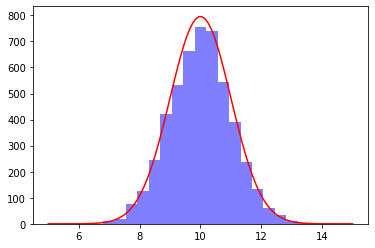

In [29]:
num_bins = 20
x = np.linspace(5,15,100)  # params are Xmin, Xmax, and num points between
max_prob = stats.norm.pdf(theoretical_mean, theoretical_mean, theoretical_std)
max_height = max_prob*observations
plt.plot(x, max_height*stats.norm.pdf(x, theoretical_mean, theoretical_std),color='red')
plt.hist(data, bins=num_bins, facecolor='blue', alpha=0.5)
plt.show()

### Use scipi

In [56]:
# Compute Gaussian probabilities with scipi
from scipy.stats import norm  # one way to do it
from scipy.stats import multivariate_normal  # can be used for univariate too
mean=5; var=1; std=1
print("Mean = %d, variance=%d"%(mean,var))
for x in range(10):
    y = multivariate_normal.pdf(x, mean=mean, cov=var)
    z = norm(mean,std).pdf(x)  # should be same
    print("Prob(%d) = %f = %f"%(x,y,z))

Mean = 5, variance=1
Prob(0) = 0.000001 = 0.000001
Prob(1) = 0.000134 = 0.000134
Prob(2) = 0.004432 = 0.004432
Prob(3) = 0.053991 = 0.053991
Prob(4) = 0.241971 = 0.241971
Prob(5) = 0.398942 = 0.398942
Prob(6) = 0.241971 = 0.241971
Prob(7) = 0.053991 = 0.053991
Prob(8) = 0.004432 = 0.004432
Prob(9) = 0.000134 = 0.000134


## Multivariate Gaussian PDF
Start with univariate.  
$X \sim \mathcal{N} (\mu,\sigma)=(\frac{1}{\sigma \sqrt(2\pi)})e^{[\frac{-1}{2}(\frac{X-\mu}{\sigma})^2]}$  

In the above, X and $\mu$ were scalar with #dimensions D=1.   
Now, rewrite univariate distribution as function of mean and variance.  
Also, make D explicit.  

$X \sim \mathcal{N} (\mu,\sigma^2)=(\frac{1}{\sqrt{\sigma^2} * (2\pi)^{D/2}})e^{[\frac{-1}{2} * \frac{(X-\mu)*(X-\mu)}{\sigma^2}]}$

Next make X and $\mu$ vectors with D>1 dimensions.   
Substitute covariance matrix $\Sigma$ for variance $\sigma^2$.   
Use the determinant under the square root.  
Use the inverse for matrix multiplication.   

$\bar X \sim \mathcal{N} (\bar \mu,\Sigma)=(\frac{1}{\sqrt{|\Sigma|} * (2\pi)^{D/2}})e^{[\frac{-1}{2} * (\bar X - \bar \mu)^{T}*\Sigma^{-1}*(\bar X - \bar \mu)]}$  

If X and Y are independent, $\Sigma$ is a diagonal matrix,
and the multivariate pdf is the product of the univariate pdfs.

If cov is proportional to the identity matrix I, the distribution is spherical.  
Whitening is the transformation that makes this so.  
Otherwise, the data clouds are ellipsoids, and
the eigenvectors of cov are the principal axiis of the ellipsoids.  

Just as $(x-\mu)^2 / \sigma$ is the univariate distance in Zs,  
so $(x-\mu_x)^T\Sigma^{-1}(y-\mu_y) / \sigma$ is the multivariate Mahalanobis distance in Zs.

### Use numpy multivariate

In [57]:
# use numpy.random.Generator.multivariate_normal
# to make a multi-dimentional array of random numbers
mean = (1, 2)    # means along two dimensions
cov = [[1, 0], [0, .5]]    # diagonals=variances, off-diagonals=independence
rng = np.random.default_rng()
x = rng.multivariate_normal(mean, cov, (3, 3))  ## make a 3x3 matrix of tuples
x.shape
# Makes more sense to create a list of tuples
x = rng.multivariate_normal(mean, cov, 9)  
# Each of 9 elements is a tuple.
# Each tuple has one number from each dimension. 
x

array([[ 1.08479177,  2.48842763],
       [ 0.79178881,  2.60267781],
       [ 1.35985034,  3.65101302],
       [ 0.90345808,  1.88058846],
       [ 0.24382427, -0.12158423],
       [ 0.54800067,  3.12272474],
       [ 1.35369942,  1.8848787 ],
       [ 1.7731609 ,  1.4205317 ],
       [ 1.5759858 ,  2.50448633]])

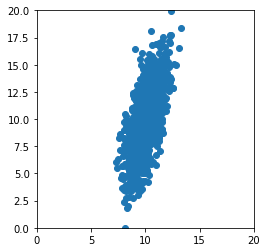

In [69]:
# X-axis: random numbers, mean=10, variance=1, covariance=2
# Y-axis: random numbers, mean=10, variance=10, covariance=2
mean = (10, 10)    # means along two dimensions
cov = [[1, 2], [2, 10]]    # diagonals=variances, off-diagonals=independence
x = rng.multivariate_normal(mean, cov, 1000)  # generate tuples all at once
x1 = [tup[0] for tup in x]   # separate out the tuples for plotting
y1 = [tup[1] for tup in x]
plt.xlim(0, 20)    # Keep X and Y axis same size
plt.ylim(0, 20)
plt.gca().set_aspect('equal', adjustable='box')   # draw square instead of rectangle
plt.scatter(x1, y1)
plt.show()

### Use scipy

In [70]:
from scipy.stats import multivariate_normal  # can be used for univariate too
print("Probability density along center vertical of picture above")
print("Mean = ",mean," variance = ",cov)
for x2 in range(0,20,2):
    x1=10
    y = multivariate_normal.pdf((x1,x2), mean=mean, cov=cov)
    print("Prob at %d,%d = %f "%(x1,x2,y))

Probability density along center vertical of picture above
Mean =  (10, 10)  variance =  [[1, 2], [2, 10]]
Prob at 10,0 = 0.000016 
Prob at 10,2 = 0.000314 
Prob at 10,4 = 0.003235 
Prob at 10,6 = 0.017127 
Prob at 10,8 = 0.046556 
Prob at 10,10 = 0.064975 
Prob at 10,12 = 0.046556 
Prob at 10,14 = 0.017127 
Prob at 10,16 = 0.003235 
Prob at 10,18 = 0.000314 


## Covariance matrix
Compute variance over n samples like this:    
var(X) = $\sigma^2(X) = (1/n)\sum_1^n[(\mu-x)^2]$  

Rewrite variance as covariance of X with itself:    
cov(X,X) = $\sigma(X,X) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{x}-x)^T]$  

Compute covariance like this:     
cov(X,Y) = $\sigma(X,Y) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{y}-y)^T]$  

Covariance matrix:  
This is a symmetric matrix.   
Diagonal elements = Variance(X).   
Off-diagonals = Covariance(X,Y).   

    Matrix    Circle  WideElipse  TallElipse  DiagonalElipse
    XX  XY    1 0     2 0         1 0         1 2
    YX  YY    0 1     0 1         0 2         2 1



Correlation vs Covariance:  
There are similarities and differences.    
Correlation varies from -1 to +1.  
+ Positive cor gives a bottom-left to top-right diagonal.  
+ Negative cor gives a bottom-right to top-left diagonal.  
+ Zero cor implies independence.  

Covariance varies from can be anything.  
+ Positive off-diagonal cov gives a bottom-left to top-right diagonal.  
+ Negative off-diagonal cov gives a bottom-right to top-left diagonal.  
+ Zero covariance means statistical independence.  

Imagine data tight on the positive diagonal.  
The XY correlations are close to 1 because large X correlates to large Y.  
But the XY covariances are close to variances.  

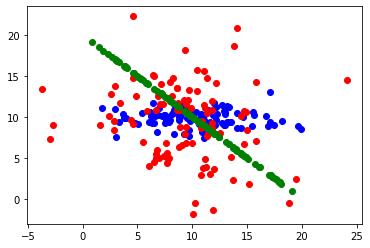

In [81]:
from scipy.stats import multivariate_normal
means = np.array([10,10])
N = 100
covB = np.array([[20, 0], [0, 1]]) # blue : high X variance
covR = np.array([[20, 0], [0, 20]]) # red : high X and Y variance, no covariance
covG = np.array([[20, -20], [-20, 20]])  # green : covariance close to variance
dataB = multivariate_normal.rvs(means, covB, N)
dataR = multivariate_normal.rvs(means, covR, N)
dataG = multivariate_normal.rvs(means, covG, N)
plt.scatter(dataB[:,0],dataB[:,1],color='blue')
plt.scatter(dataR[:,0],dataR[:,1],color='red')
plt.scatter(dataG[:,0],dataG[:,1],color='green')
plt.show()

### Using numpy

Note on numpy peculiarity noted on [StackOverflow](https://stackoverflow.com/questions/17428621/python-differentiating-between-row-and-column-vectors)   
Although np.transpose(2x3matrix) returns a (3x2matrix),   
and np.dot(np.transpose) handles the transpose correctly,   
numpy transposes matrices for you as needed for calculations,   
so you can usually get away without coding the transpose.   
In fact, numpy vectors are not inherently row-vectors or column vectors.   
So np.transpose(vector) is a no-op.   

In [82]:
# Demonstrate that numpy does the transpose for you
mylist = [1,2,3]
myvector = np.array(mylist)
print("original=",myvector,"transpose=",np.transpose(myvector),
      "dot product:",myvector.dot(np.transpose(myvector)))
print("Same result without the transpose:",myvector.dot(myvector))

original= [1 2 3] transpose= [1 2 3] dot product: 14
Same result without the transpose: 14


### Covariance, implemented from scratch 
(well, using numpy for matrix multiplication)  
We'll handle the easiest case: using 2 variables and 2x2 covariance matrix.  
The computation requires matrix inverse and matrix determinant.  
The computation gets harder at higher dimensions.  
In fact, the compute can be impossible (when matrix not positive semidefinite).  
So, we'll just implement the simple 2x2 case.  

In [83]:
def roll_matrix(a,b,c,d):  # return 2x2 array
    M = np.zeros((2,2))
    M[0,0] = a
    M[0,1] = b
    M[1,0] = c
    M[1,1] = d
    return M
def unroll_matrix(M):    # return matrix as tuple
    a = M[0,0]
    b = M[0,1]
    c = M[1,0]
    d = M[1,1]
    return a,b,c,d
def determinant(M):      # determinant of 2x2 matrix
    a,b,c,d = unroll_matrix(M)
    det = a*d - b*c
    return det
def inverse(M):          # inverse of 2x2 matrix (may not exist)
    det = determinant(M)
    if det==0:
        return None
    denominator = 1 / det
    tup = unroll_matrix(M)
    a,b,c,d = tuple(t/denominator for t in tup) 
    IM = roll_matrix(d,-b,-c,a)
    return IM

In [1]:
# Use numpy for dot product = inner product = sum ai*bi.
def mahalanobis_distance(X,means,cov):   # distance X from distribution, used by Gauss
    inv = inverse(cov) # inverse: 2x2 matrix
    dev = np.subtract(X,means) # X - mu elementwise vector subtraction
    prod = dev.dot(inv).dot(dev)   # (deviation)(inverse Sigma)(deviation)
    return prod
def multivariate_gaussian_prob(X,means,cov):
    """Shapes X:1x2, means:1x2, covariance:2x2"""
    det = determinant(cov) # determinant: scalar
    constant = 1/(math.sqrt(det)*2*math.pi) # scalar. At D=2, no need for sqrt(2pi)
    md = mahalanobis_distance(X,means,cov)
    exponent = (-1/2)*md
    prob = constant * math.exp(exponent)
    return prob

### Test our results against scipy

In [96]:
from scipy.stats import multivariate_normal
means = np.asarray( (5,3) )
cov = roll_matrix(10,3,3,1)
X = np.asarray( (5,3) )   
lib=multivariate_normal(mean=[5,3], cov=[[10,3],[3,1]])
print("Point at dead center")
print("Our value:",multivariate_gaussian_prob(X,means,cov))
print("Lib value:",lib.pdf(X))

Point at dead center
Our value: 0.15915494309189535
Lib value: 0.1591549430918954


In [97]:
X = np.asarray( (6,3) ) 
print("Point at Y center, off-center X")
print("High variance of X makes this pretty likely")
print("Our value:",multivariate_gaussian_prob(X,means,cov))
print("Lib value:",lib.pdf(X))

Point at Y center, off-center X
High variance of X makes this pretty likely
Our value: 0.09653235263005391
Lib value: 0.09653235263005393


In [98]:
X = np.asarray( (5,4) )  
print("Point at Y off-center, center X")
print("Low variance of Y makes this pretty unlikely")
print("Our value:",multivariate_gaussian_prob(X,means,cov))
print("Lib value:",lib.pdf(X))

Point at Y off-center, center X
Low variance of Y makes this pretty unlikely
Our value: 0.0010723775711956546
Lib value: 0.0010723775711956479
